### **Data Cleaning**

### **Steps**
1. Clean the data.
2. Finding the percentage of users who provided their ages in their user profile(can be found in add_info column)
3. Finding the number of post per date.
4. Saving the output of the cleaned data as a csv file. The dataframe will contain the following columns
Username, title, Post and likes_claims, and should be sorted in descending order by likes_claims. (***万 = 10000***)

In [1]:
import pandas as pd
import numpy as np

#read csv
df = pd.read_csv('Data.csv')

#add column headers:
df.columns = ['Index', 'Username', 'Location', 'Title', 'Post', 'Likes',
             'Stars', 'Comments', 'Date of Post', 'Date of Scrape',
             'XHS Id', 'User Bio', 'Add Info', 'Followers',
             'Following', 'Likes and Claims']

"""CLEAN:"""

#clean 'Col','Cmt','None','Like' into 0
#assuming the scraper couldnt read these as they were 0
df.replace({'Stars': 'Col', 'Comments': 'Cmt', 'Followers': 'None',
            'Following': 'None', 'Likes and Claims': 'None', 'Likes':'Like'}, 0, inplace=True)

#remove remaining empty
df.dropna(inplace = True)

"""change data types:"""

#replace 万 with 10,000 & convert to int
cols=['Followers','Following','Likes and Claims','Likes','Stars','Comments']
df[cols] = df[cols].replace({'万':'0000', '\ ' : '', '\.' : '', 'K':'000'}, regex=True).apply(pd.to_numeric)

#change datatypes of string collums
cols=['Username','Location','Title','Post','User Bio']
df[cols] = df[cols].astype('string')

#remove 小红书
#df['XHS Id'] = df['XHS Id'].astype('string')
df['XHS Id'] = df['XHS Id'].str.replace('小红书ID: ', '')

#change datatypes of int collumns
cols=['Likes','Stars','Comments']
df[cols] = df[cols].astype('int')

#change datatypes of date collums
df['Date of Post'] = df['Date of Post'].replace({'Jan':'1', 'Feb' : '2', 'Mar' : '3', 'Apr':'4', 'May': '5',
                            'Jun': '6', 'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11',
                            'Dec': '12', '[a-zA-Z\s+]': '', '/' : '-'}, regex=True).apply(pd.to_datetime, format='%m-%d-%Y', errors='coerce')
df['Date of Scrape'] = df['Date of Scrape'].apply(pd.to_datetime, format='%Y-%m-%d', errors='coerce')

#remove rows without full date
df.dropna(inplace = True)

#recount index
df['Index'] = np.arange(df.shape[0])
df.set_index(['Index'])

df



,Index,Username,Location,Title,Post,Likes,Stars,Comments,Date of Post,Date of Scrape,XHS Id,User Bio,Add Info,Followers,Following,Likes and Claims
2,0,M2M,None,Brunello Cucinelli 秋冬男装羊绒混丝打底,Bc 男款贴身穿羊绒加丝打底，羽绒服内搭的好货,3,2,0,2021-11-22,2022-02-26,108715269,"喜欢小众的设计师品牌，lp和bc的超级fans, 无线电爱好者…More",广东深圳/,22,919,2631
9,1,🌸利利🌸,重庆IFS,Brunello cucinelli,弹力羊绒休闲套装，软软糯糯,1,4,3,2021-09-14,2022-02-26,605991183,Brunello cucinelli 山羊绒之王 真正的奢侈品牌 带你了解第一资讯,Age 35/重庆/,69,230,799
10,2,RoRo,None,家门口ootd,打折买的bc羊绒衫，先生直呼不好看显老，新剪的短发配上我的素颜也被批评了一番。但不谈舒适的好...,42,11,12,2021-01-28,2022-02-26,aurorazhang,素人一枚 分享喜欢的,Taurus/湖南长沙/,339,230000,590000
11,3,VV小姐,None,原图无修图无滤镜的美魔女章小蕙,昨晚 #布鲁奈罗·库奇内利 Brunello Cucinelli 和时尚芭莎的时尚晚宴巧遇美...,10000,111,137,2021-11-10,2022-02-26,100868166,Loving My Life ❤️ 仅唯一账号，其他假冒,上海/时尚博主/,109,700000,1310000
12,4,啊这是米高啊,深圳湾万象城,Brunello Cucinelli｜套头羊绒衫,童装灰色套头羊绒衫 左手腕处有四圈最经典的Monili设计 面料：100%山羊绒 颜色：...,2,0,3,2021-08-21,2022-02-26,100003596,努力搬砖成为大家的天使SA 平平无奇的BC打工人 BC童装挖宝机🧏🏻‍♀️ 欢迎大家来深圳湾...,Aries/广东深圳/,74,552,1470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,767,大宇名奢,None,Brunello Cucinelli男士秋冬蓝色打底衫,Brunello Cucinelli 2020秋冬款 蓝色圆领针织衫 100%羊绒 折后36...,2,1,0,2021-11-18,2022-02-26,748395585,有问题私,Sagittarius/中国/时尚博主/,11,1263,3636
1012,768,大宇名奢,None,Brunello cucinelli男士羽绒马甲假两件,Brunello cucinelli 🚹圣诞节私人折扣 橄榄绿 羽绒马甲 假两件套 原价25...,4,4,0,2020-12-21,2022-02-26,748395585,有问题私,Sagittarius/中国/时尚博主/,11,1263,3636
1016,769,大宇名奢,None,Brunello cucinelli男士羊绒针织连帽衫,Brunello cucinelli 🚹 圣诞节私人折扣开始。 专柜在售款开衫外套100%针...,33,23,4,2020-12-11,2022-02-26,748395585,有问题私,Sagittarius/中国/时尚博主/,11,1263,3636
1017,770,大宇名奢,None,brunello cucinelli男士v领羊绒衫长袖,brunello cucinelli 🚹2020春夏新到款 橄榄绿 v领 100%羊绒衫 折...,1,1,1,2021-03-12,2022-02-26,748395585,有问题私,Sagittarius/中国/时尚博主/,11,1263,3636


In [2]:
"""AGE % :"""
age_included = df[df['Add Info'].str.contains("Age", na=False)]

age_included_percent = age_included.shape[0] / df.shape[0] * 100

print('Age Included : ' , age_included_percent , "%")


Age Included :  17.875647668393782 %


In [3]:
"""POSTS PER DATE"""
df1 = df['Date of Post'].dt.date.value_counts().sort_index().reset_index()
df1.columns = ['Date of Post','Count']

df1

,Date of Post,Count
0,2018-04-08,4
1,2018-05-30,5
2,2018-07-06,1
3,2018-09-21,2
4,2018-10-24,3
...,...,...
216,2021-12-22,1
217,2021-12-23,1
218,2021-12-24,4
219,2021-12-29,7


In [4]:
"""MAKE CSV OUTPUT"""
#columns: Username, title, Post and likes_claims. If should be sorted in descending order my likes_claims
df_out = df.drop(df.columns.difference(['Username','Title', 'Post', 'Likes and Claims']), 1)
df_out = df_out.sort_values(by=['Likes and Claims'],ascending=False)

#write to csv
df_out.to_csv('BrunelloCucinelli.csv', index=False)
df_out

/tmp/ipykernel_21755/3709548335.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_out = df.drop(df.columns.difference(['Username','Title', 'Post', 'Likes and Claims']), 1)


,Username,Title,Post,Likes and Claims
341,大睿睿,母女穿搭👭我长大了，只想给你最好的❤️,很久没跟妈妈见面聊天了，这次她来深圳陪我，就趁着周末度过了一个姐妹般的下午～逛街买衣服聊天～...,18590000
1018,啾鼠,别去东京买手店了！银座男装这里NO.1！,来到亚洲的时尚中心，一定要买买买！ 不过男生们有没有觉得，每次去逛买手店，因为面积有限，每个...,13130000
925,啾鼠,别去东京买手店了！银座男装这里NO.1！,来到亚洲的时尚中心，一定要买买买！ 不过男生们有没有觉得，每次去逛买手店，因为面积有限，每个...,13130000
532,你的猴哥,如果路上看到这样穿着的人你觉得是什么职业,如果你在街上看到这样穿搭的男士，你会觉得他是做什么职业的呢？ ☑️穿搭信息 🧥：睿制男装 👖...,3900000
685,Nancy,None,开始喜欢Brunello Cucinelli 是因为刘涛在欢乐颂穿了大量这个品牌的衣服，优雅...,3190000
...,...,...,...,...
802,是你萌姐,许凯封面｜五月，没有感情的试装机器,时尚先生五月刊封面人物许凯 Total from Brunello Cucinelli（你可...,16
971,是你萌姐,许凯封面｜五月，没有感情的试装机器,时尚先生五月刊封面人物许凯 Total from Brunello Cucinelli（你可...,16
800,是你萌姐,许凯封面｜五月，没有感情的试装机器,时尚先生五月刊封面人物许凯 Total from Brunello Cucinelli（你可...,16
610,YIJIA,2021年1月全球时尚要闻【1 月 13 日​】,1. 国内服饰零售商太平鸟预计2020年全年净利润将同比大涨27%至7亿元人民币，归属于上市...,12


### **Twitter Data**
"russia ukraine conflict.csv" contain data about twitter postings about the Ukraine conflict and China. 


### **Steps**
1. Opening/exploring the data set
2. As a data scientist, How can I analyse this data to extract information from this unstructured data set. 
3. Finding a way to approximately determine from which geographical location people are talking about this topic?
3. Using NLTK to understand if people have a positive or negative feeling about this situation.
4. Categorization approach

In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from labellines import labelLines
from matplotlib.pyplot import text
import nltk

#read csv
df_rus = pd.read_csv('russia ukraine conflict.csv')

df_rus = df_rus.reset_index()

#create sub table:
df_rus_cut = df_rus.drop(df_rus.columns.difference(['Text','Datetime', 'Location (Filtered)', 'Importance', 'Text']), 1)
df_rus_cut.replace('None', np.NaN, inplace=True)
df_rus_cut.dropna(inplace=True)

#change datetime to date
df_rus_cut['Datetime'] = pd.to_datetime(df_rus_cut['Datetime']).dt.date
df_rus_cut.rename(columns={'Datetime':'Date'}, inplace=True)

#change location to string
df_rus_cut['Location (Filtered)'] = df_rus_cut['Location (Filtered)'].astype('string')
df_rus_cut['Text'] = df_rus_cut['Text'].astype('string')

#trim and clean:
df_rus_cut['Location (Filtered)'] = df_rus_cut['Location (Filtered)'].str.strip().replace('United States of America', 'United States')

#group by country:
df_country = df_rus_cut[['Location (Filtered)','Date']].value_counts().reset_index()
df_country.columns = ['Location','Date','Count']

df_country

/tmp/ipykernel_22791/2233254214.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_rus_cut = df_rus.drop(df_rus.columns.difference(['Text','Datetime', 'Location (Filtered)', 'Importance', 'Text']), 1)


,Location,Date,Count
0,United States,2022-02-24,3913
1,United States,2022-02-25,2739
2,United States,2022-02-26,2008
3,India,2022-02-24,1395
4,India,2022-02-26,1201
...,...,...,...
2985,Laos,2022-02-05,1
2986,Laos,2022-02-04,1
2987,Laos,2022-01-27,1
2988,Kyrgyzstan,2022-02-27,1


In [46]:
import pycountry_convert as pc

"""CATEGORIZE"""
#country to continent:
#cont_map = pc.map_countries(cn_name_format="default")
#print(cont_map)
def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        return continent_name
    except:
        return 'error'

countries = list(df_country['Location'])
conts = [country_to_continent(country)for country in countries]

df_continent = df_country.copy()
df_continent['Location'] = np.array(conts)
df_continent = df_continent[df_continent.Location != 'error']

#minimum tweet cutoff
filter_cap = 100
df_country = df_country[df_country['Count'] > filter_cap]
df_continent = df_continent[df_continent['Count'] > filter_cap]

print(df_country)
print(df_continent)

         Location        Date  Count
0   United States  2022-02-24   3913
1   United States  2022-02-25   2739
2   United States  2022-02-26   2008
3           India  2022-02-24   1395
4           India  2022-02-26   1201
..            ...         ...    ...
76       Pakistan  2022-02-25    111
77        Germany  2022-02-25    110
78        Germany  2022-02-26    107
79          India  2022-02-15    105
80        Nigeria  2022-02-26    102

[81 rows x 3 columns]
   Location        Date  Count
0        NA  2022-02-24   3913
1        NA  2022-02-25   2739
2        NA  2022-02-26   2008
3        AS  2022-02-24   1395
4        AS  2022-02-26   1201
..      ...         ...    ...
76       AS  2022-02-25    111
77       EU  2022-02-25    110
78       EU  2022-02-26    107
79       AS  2022-02-15    105
80       AF  2022-02-26    102

[80 rows x 3 columns]


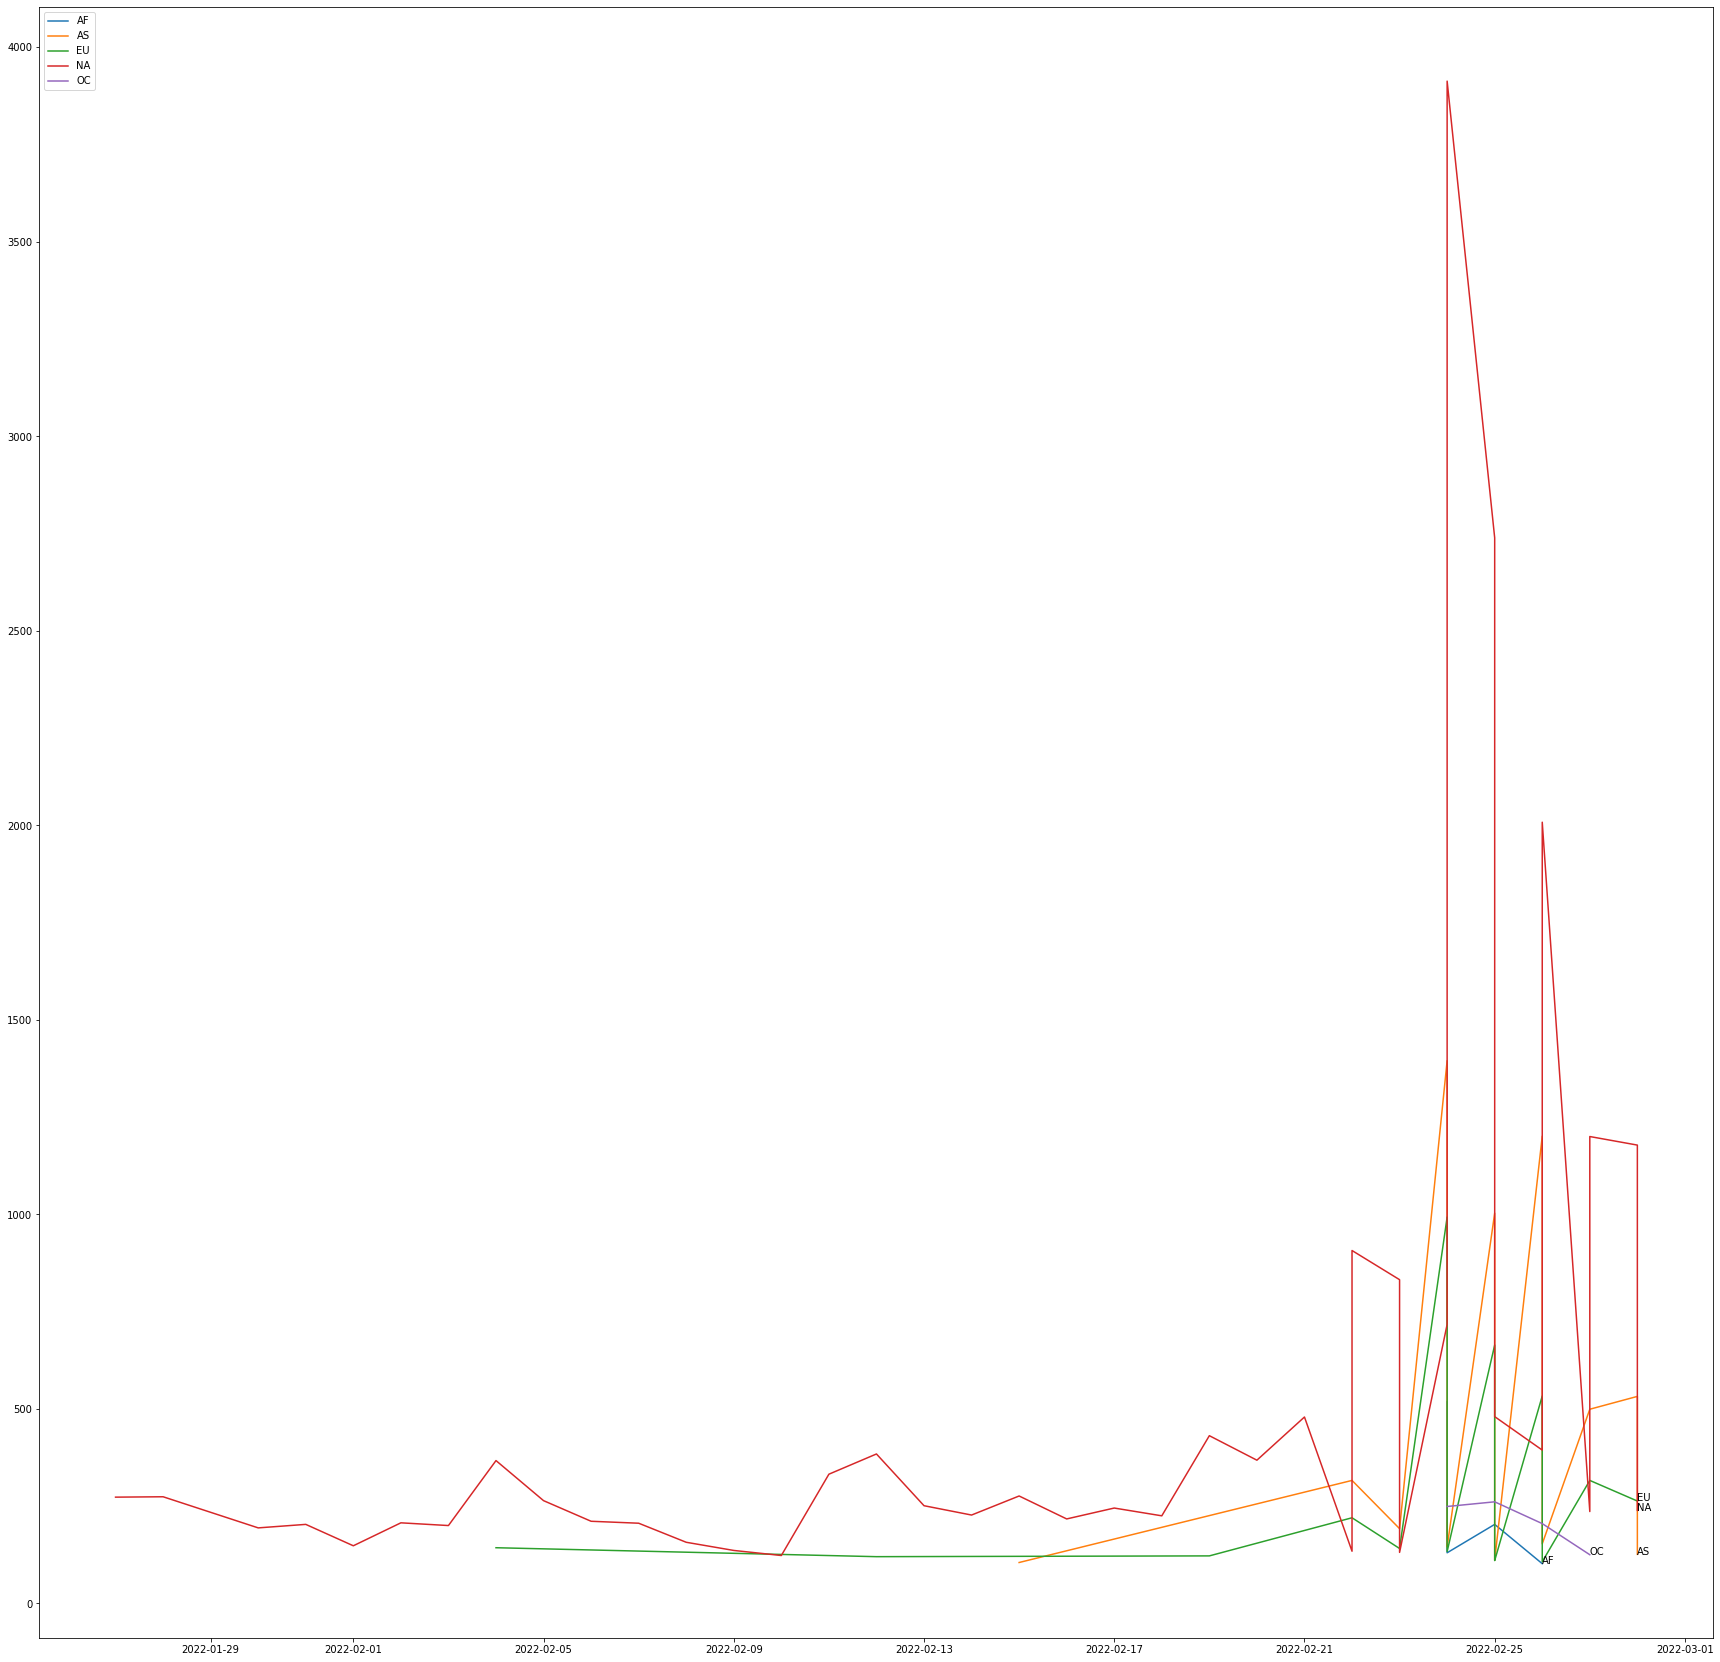

In [43]:
"""Plot continents"""
#matplot:
plt.figure(figsize=(30, 30))

#country
for continent, df_continent in df_continent.groupby('Location'):
    #sort by date:
    df_continent = df_continent.sort_values(by=['Date'],ascending=True)
    #only use countries with more than 3 entries
    #if df_conts.shape[0] > 3:   
    #print(df_country)
    x = df_continent['Date'].values
    y = df_continent['Count'].values
    line = plt.plot(x, y, label=continent)
    text(x[-1],y[-1],continent)

plt.legend(loc="upper left")
plt.show()

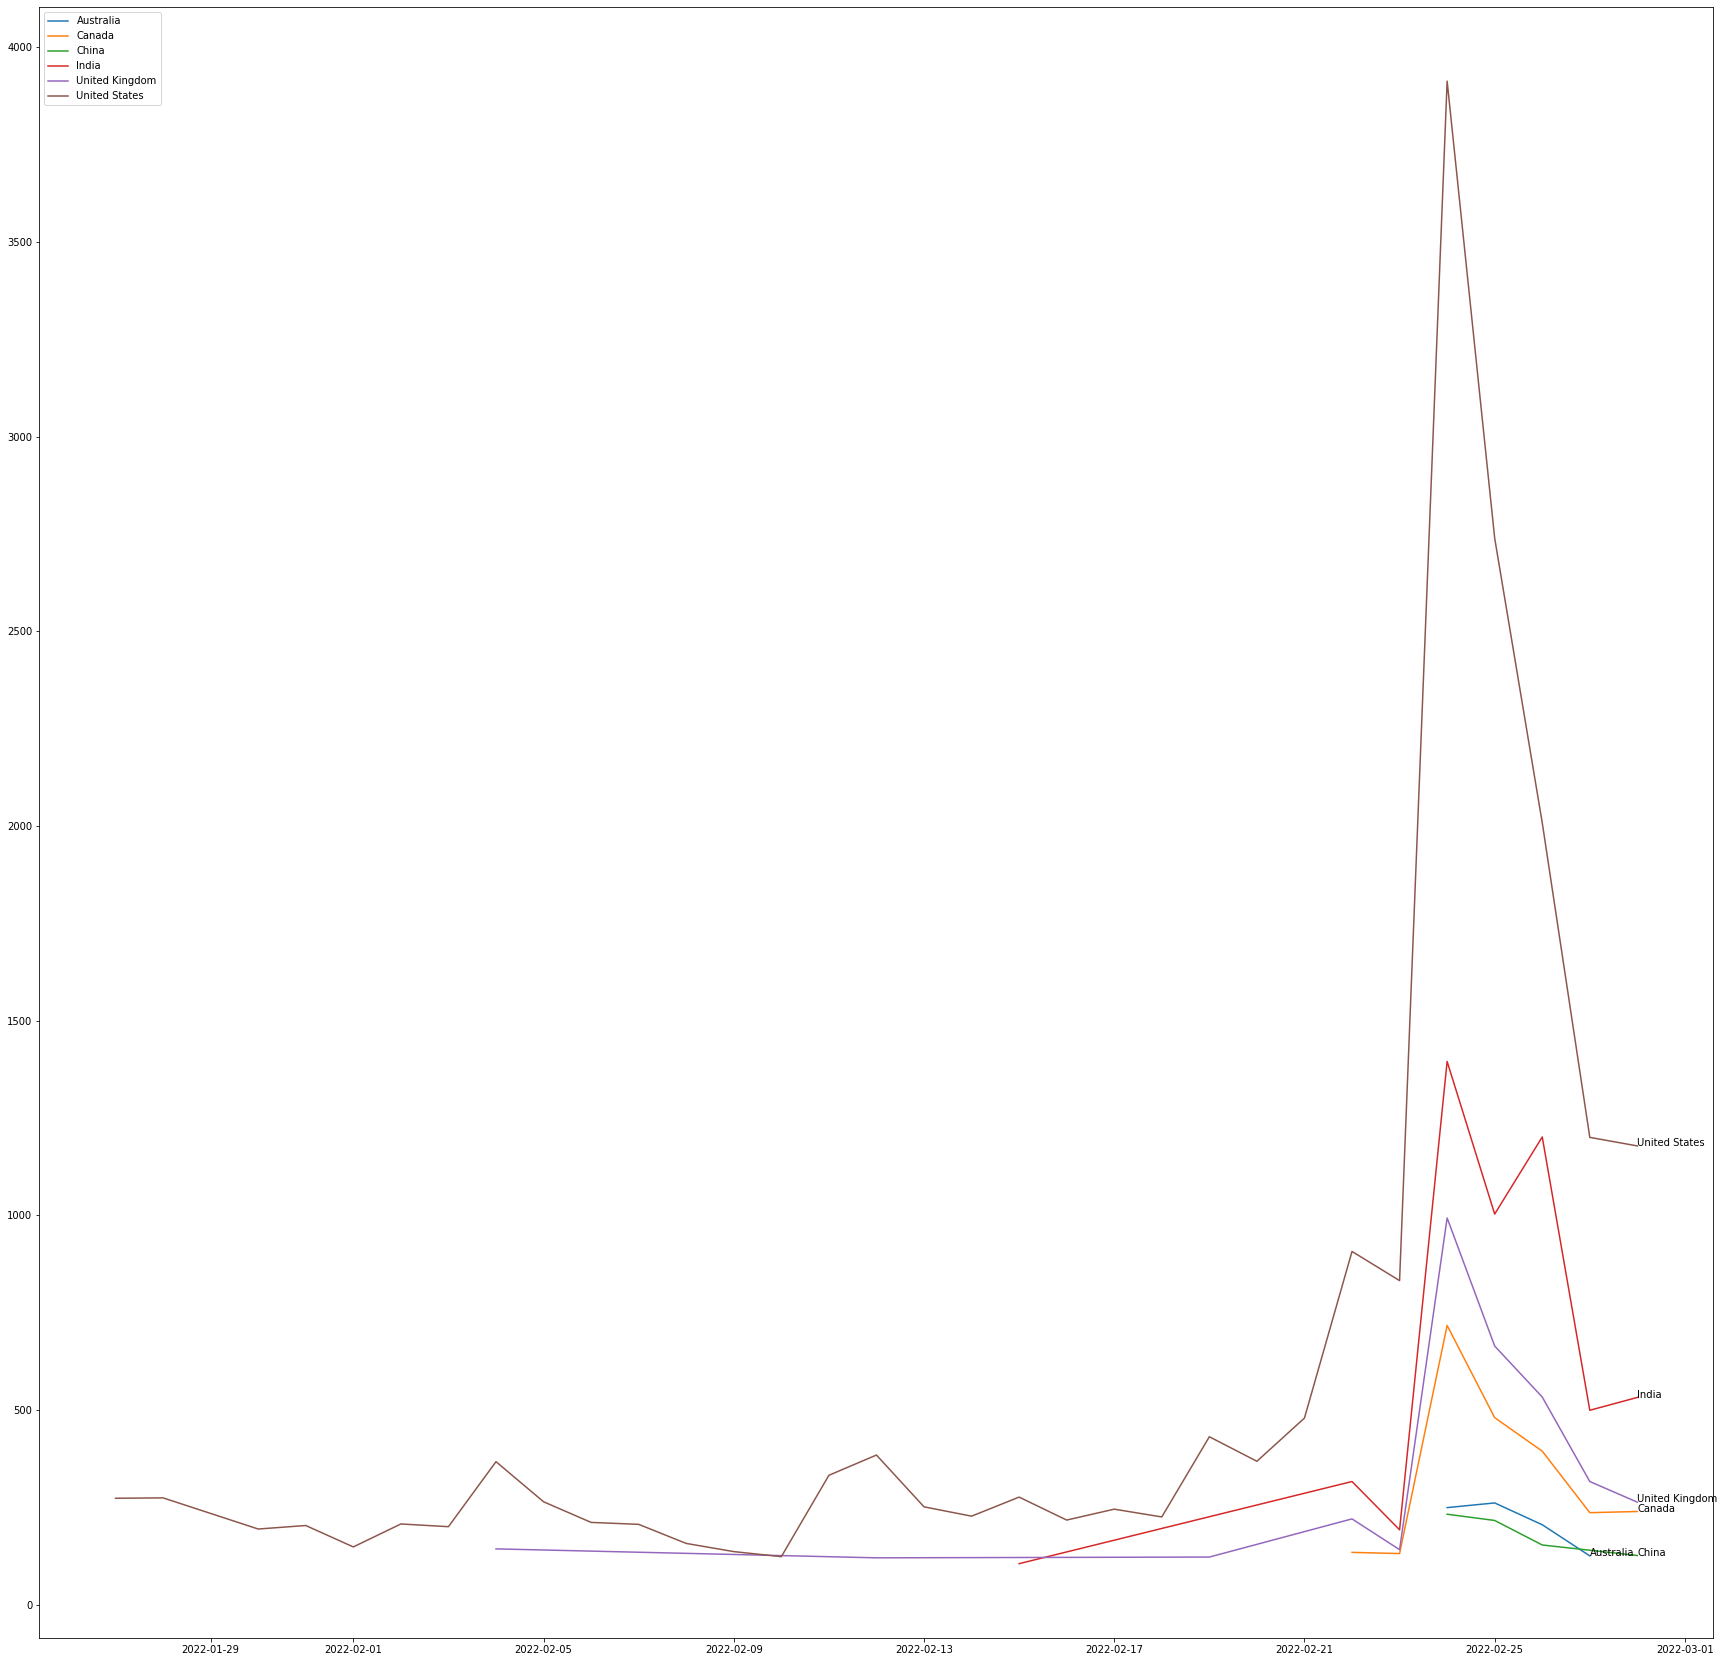

         Location        Date  Count
29  United States  2022-01-27    273
28  United States  2022-01-28    274
38  United States  2022-01-29    234
52  United States  2022-01-30    194
49  United States  2022-01-31    203
59  United States  2022-02-01    148
46  United States  2022-02-02    207
51  United States  2022-02-03    200
23  United States  2022-02-04    367
30  United States  2022-02-05    264
45  United States  2022-02-06    211
47  United States  2022-02-07    206
57  United States  2022-02-08    157
63  United States  2022-02-09    136
71  United States  2022-02-10    123
24  United States  2022-02-11    332
21  United States  2022-02-12    384
33  United States  2022-02-13    251
40  United States  2022-02-14    227
27  United States  2022-02-15    276
43  United States  2022-02-16    217
35  United States  2022-02-17    245
41  United States  2022-02-18    225
19  United States  2022-02-19    431
22  United States  2022-02-20    368
18  United States  2022-02-21    479
9

In [44]:
"""Plot Countries"""
#matplot:
plt.figure(figsize=(30, 30))

#country
for country, df_country in df_country.groupby('Location'):
    #sort by date:
    df_country = df_country.sort_values(by=['Date'],ascending=True)
    #only use countries with more than 3 entries
    if df_country.shape[0] > 3:   
        #print(df_country)
        x = df_country['Date'].values
        y = df_country['Count'].values
        line = plt.plot(x, y, label=country)
        text(x[-1],y[-1],country)

plt.legend(loc="upper left")
plt.show()

print(df_country)
print(df_continent)

In [47]:
"""SENTIMENT ANALYSIS:"""

"""Clean and Lemmatize"""
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk import FreqDist
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('omw-1.4')
#nltk.download('stopwords')
stop_words = stopwords.words('english')

#read df['text'] into a string array for processing
str_arr = df_rus_cut['Text'].values

#lemmatize and remove noise (such as hyperlinks)
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        token = re.sub("\,", "", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

#print(tokenised[:1])

#tokenise
tokenised = []
for tweet in str_arr:
    tokenised.append(remove_noise(tweet.strip().split(), stop_words))

In [48]:
"""Train Model"""
import random

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

#print(remove_noise(tweet_tokens[0], stop_words))

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

#print(positive_tweet_tokens[500])
#print(positive_cleaned_tokens_list[500])

#prepare tweets for Model by converting to dict
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

"""create positive and negative datasets:"""
positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset
#shufffle
random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]


In [49]:
"""PRESENT OUTPUT OF TRAINED MODEL:"""
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.995
Most Informative Features
                      :( = True           Negati : Positi =   2076.8 : 1.0
                      :) = True           Positi : Negati =    978.7 : 1.0
                follower = True           Positi : Negati =     40.3 : 1.0
                    glad = True           Positi : Negati =     21.3 : 1.0
                  arrive = True           Positi : Negati =     20.6 : 1.0
                     sad = True           Negati : Positi =     20.0 : 1.0
                     bam = True           Positi : Negati =     18.0 : 1.0
               community = True           Positi : Negati =     16.0 : 1.0
                 welcome = True           Positi : Negati =     15.0 : 1.0
                     via = True           Positi : Negati =     14.7 : 1.0
None


In [50]:
"""HANDLING OF RUSSIAN/UKRAINE DATA"""

"""FREQUENCY ANALYSIS:"""
#word freq counter
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_words = get_all_words(tokenised)
freq_dist_pos = FreqDist(all_words)
print(freq_dist_pos.most_common(10))


"""POSITIVE/NEGATIVE SENTIMENT ANALYSIS"""
#prepare for model
pos_neg = []

for tweet in tokenised:
    custom_tokens = remove_noise(tweet)
    sentiment = classifier.classify(dict([token, True] for token in custom_tokens))
    pos_neg.append(sentiment)
    

[('china', 44506), ('russia', 43114), ('ukraine', 36324), ('us', 9123), ('&amp;', 8714), ('taiwan', 8395), ('invade', 8066), ('#ukraine', 7588), ('war', 7190), ('#russia', 6684)]


Input cut off minimum (number of tweets): 100


/tmp/ipykernel_22791/843274547.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(df_country, ignore_index=True)
/tmp/ipykernel_22791/843274547.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(df_country, ignore_index=True)
/tmp/ipykernel_22791/843274547.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(df_country, ignore_index=True)
/tmp/ipykernel_22791/843274547.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(df_country, ignore_index=True)
/tmp/ipykernel_22791/843274547.py:66: FutureWarning: The frame.appen

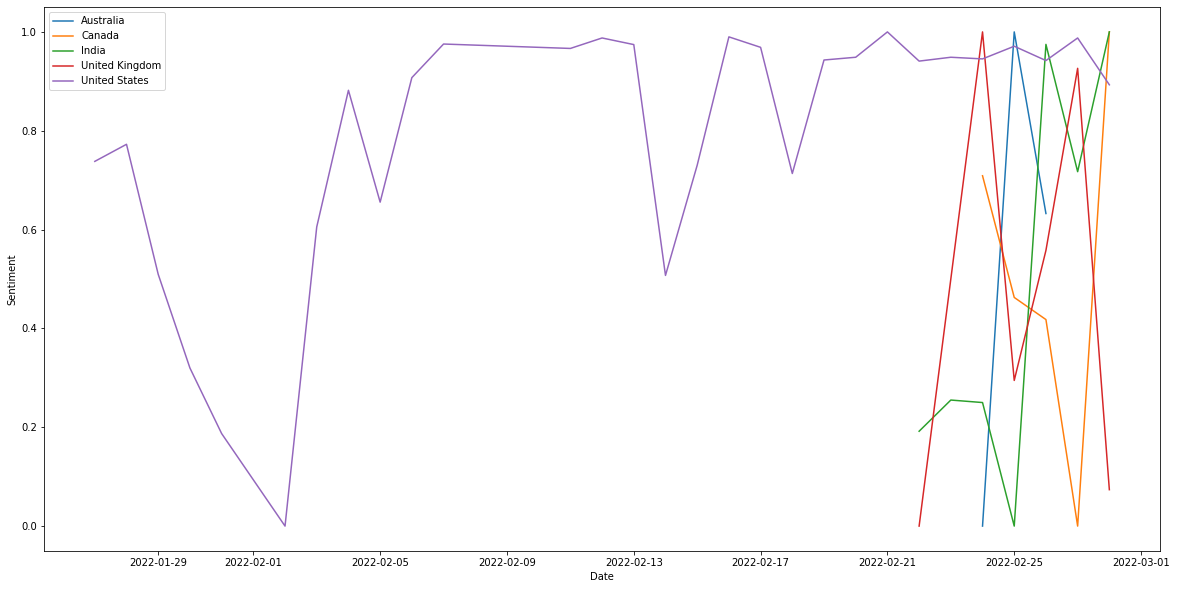

How much Countries are discussing the issue:
{'Australia': 4, 'Canada': 9, 'India': 12, 'United Kingdom': 11, 'United States': 45}
    index        Location        Date  Count  Sentiment Score
0       0       Australia  2022-02-24      2         0.000000
1       1       Australia  2022-02-25      1         1.000000
2       2       Australia  2022-02-26      1         0.632479
3       0          Canada  2022-02-24      2         0.708955
4       1          Canada  2022-02-25      2         0.462687
5       2          Canada  2022-02-26      2         0.417910
6       3          Canada  2022-02-27      2         0.000000
7       4          Canada  2022-02-28      1         1.000000
8       5           India  2022-02-22      1         0.191919
9       6           India  2022-02-23      1         0.255051
10      0           India  2022-02-24      2         0.250000
11      1           India  2022-02-25      2         0.000000
12      2           India  2022-02-26      2         0.974747
1

In [51]:
"""APPLY TO PREVIOUS TABLE"""
from sklearn.preprocessing import MinMaxScaler

df_rus_cut['Sentiment'] = pos_neg

df_rus_cut

#group by country:
df_country = df_rus_cut[['Location (Filtered)','Date', 'Sentiment']].value_counts().reset_index()
df_country.columns = ['Location','Date', 'Sentiment', 'Count']

#filter with count > n:
filter_cap = int(input("Input cut off minimum (number of tweets): "))
df_country = df_country[df_country['Count'] > filter_cap]

#matplot setup:
plt.figure(figsize=(20, 10))
plt.xlabel("Date")
plt.ylabel("Sentiment")

#found how much a country discusses this topic:
country_discuss={}

output_df = pd.DataFrame()

for country, df_country in df_country.groupby('Location'):
    
    #only use countries with more than 3 entries
    if df_country.shape[0] > 3:         
                
        #sort by date:
        df_country = df_country.sort_values(by=['Date'],ascending=True).reset_index()
        
        #make dictionary of dates and sentiment count
        country_list = {}
        for index, row in df_country.iterrows():
            if row['Date'] in country_list:
                country_list[row['Date']] = country_list[row['Date']] - int(row['Count'])
            else:
                country_list[row['Date']] = int(row['Count'])
        #print(country_list)
    
        #convert to list
        sentiment_list = list(country_list.values())
        #print(sentiment_list)
        
        #scale to 0 - 1
        scaler = MinMaxScaler()
        sentiment_list = np.array(sentiment_list)
        sentiment_list = scaler.fit_transform(sentiment_list.reshape(-1, 1))
        
        #re-sort
        df_country = df_country[['Location','Date']].value_counts().reset_index()
        #se = pd.Series(sentiment_list)
        #df_country['Sentiment'] = se.values
        df_country['Sentiment Score'] = sentiment_list
        df_country.columns = ['Location','Date', 'Count', 'Sentiment Score']
        df_country.reset_index()
        
        country_discuss[country] = df_country['Count'].sum()
        
        #sort by date:
        df_country = df_country.sort_values(by=['Date'],ascending=True).reset_index()
        
        #print(df_country)
        output_df = output_df.append(df_country, ignore_index=True)
        
        #matplot
        x = df_country['Date'].values
        y = df_country['Sentiment Score'].values
        #sentiment = df_country['Sentiment'].values
        line = plt.plot(x, y, label=country)
        #text(x[-1],y[-1],country)

plt.legend(loc="upper left")
plt.show()

print("How much Countries are discussing the issue:")
print(country_discuss)

print(output_df)

In [ ]:
#write to csv
output_df.to_csv('ukraine_russia_sentiment.csv', index=False)